<a href="https://colab.research.google.com/github/ViniciusLeopoldino/IA/blob/main/Checkpoint_IA_TDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Checkpoint 1 - EDA e Machine Learning
---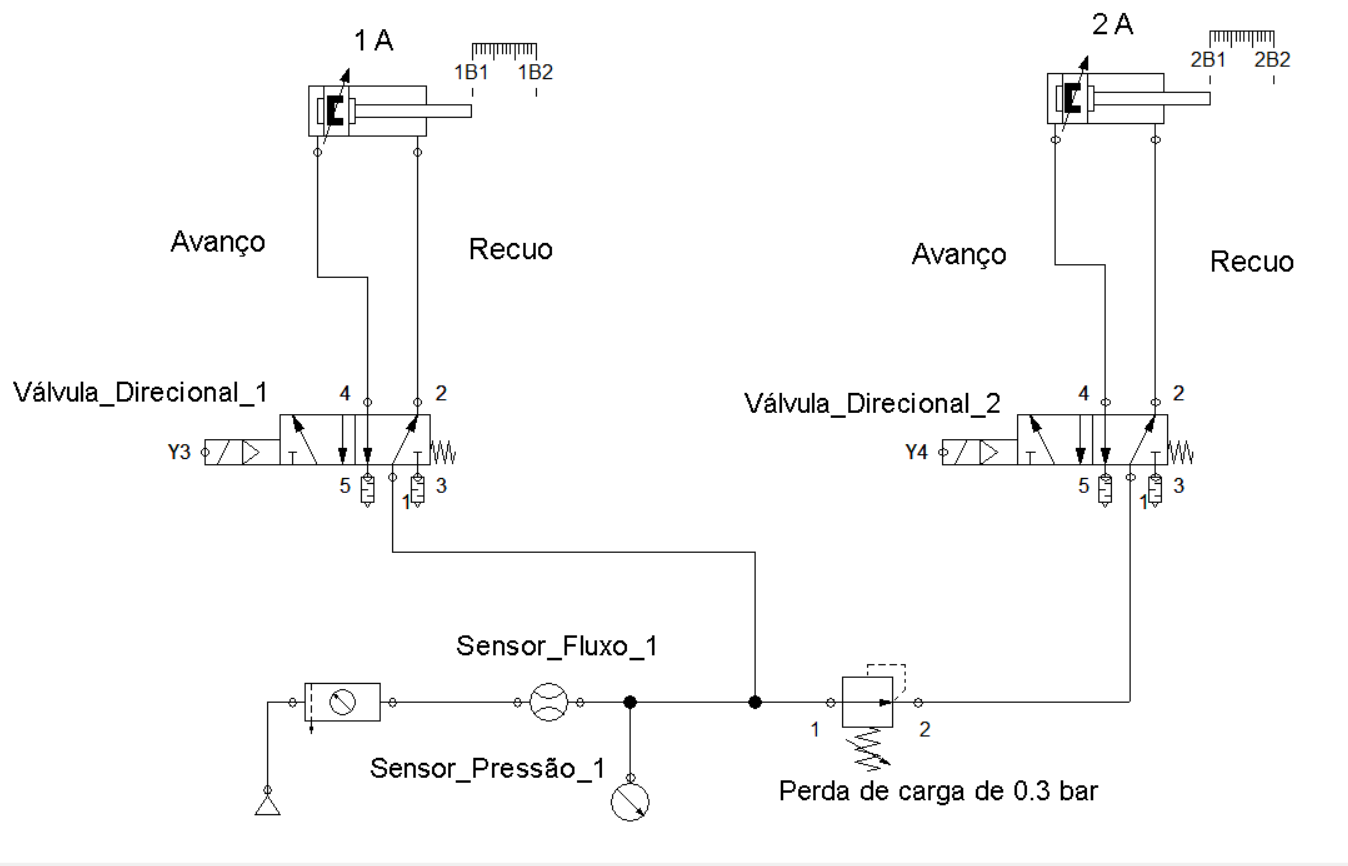

Com base no sistema industrial, foi coletado dados de um sensor de pressão e vazão. Esses dados estão no dataset que estará disponível.

Dado o dataset, as siglas significam:


*   normal: o sistema funciona normalmente;
*   v1a: É o vazamento que foi identificado no avanço da válvula 1 do sistema;
*   v1r: É o vazamento que foi identificado no recuo da válvula 1 do sistema;
*   v2a: É o vazamento que foi identificado no avanço da válvula 2 do sistema;
*   v2r: É o vazamento que foi identificado no recuo da válvula 2 do sistema;
*   v1a: É o vazamento interno que foi identificado no atuador 1 do sistema;
*   v2a: É o vazamento interno que foi identificado no atuador 1 do sistema.

Foram coletadas para todas as classes acima uma variação de 5.4 a 6.6 bar (unidade de pressão).

(3 pts) Fazer uma análise estatística exploratória da base de dados, resumindo as variáveis e o contexto geral da base selecionada. Utilize a biblioteca TSFEL para extrair as características.

(1 pts) Construir 2 gráficos distintos utilizando as variáveis da base. Vocês podem fazer gráficos selecionando parte dos dados de acordo com filtros que julgarem pertinentes. **Atenção**:

1.   Vocês devem variar a seleção de tipos de gráficos e variáveis investigadas. A repetição da mesma variável ou do tipo de gráfico em todas as figuras acarretará desconto de nota;
2.   Todo gráfico deve conter título e legenda. Vocês estão livres para usarem quaisquer configurações a mais que desejarem;
3.	Cada gráfico gerado precisa comunicar uma conclusão relevante/interessante. Caso seu gráfico seja complexo, não deixe de resumi-lo com algumas linhas em comentários *markdown*.

(4 pts) Construir um modelo preditivocom a biblioteca Pycaret. A avaliação partirá dos seguintes critérios:
1. seleção de variável relevante ao Processo como label;
2. seleção apropriada do tipo de modelo com o label selecionado;
3. aplicação de métricas pertinentes ao modelo implementado.
4. implementação correta dos conceitos e passos de *machine learning*;
5. código executado sem erros;
6. conclusões analisando os resultados dos modelos e sua aplicabilidade real.

(1 pts) Construir 1 gráfico do tipo Matriz de Confusão utilizando as variáveis da base. Apresente a performance do modelo com classification report.


In [ ]:
#Nome:Diego Santos Cardoso RM:558711
#Nome:Pablo Lopes Doria de Andrade RM:556834
#Nome:Guilherme Felipe da Silva Souza RM:558282
#Nome:Vinicius Leopoldino de Oliveira RM:557047


In [2]:
!pip install pycaret
!pip install tsfel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [29]:
from pycaret.classification import *
import pandas as pd
import numpy as np
import tsfel
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Carrega o dataset a partir de um arquivo CSV, utilizando ',' como delimitador
dataset = pd.read_csv('dataset.csv', sep=',')

# Substitui qualquer ocorrência do valor '#VALOR!' no dataset por '0' (tratando erros ou dados inválidos)
dataset = dataset.replace('#VALOR!', '0')

# Converte a coluna 'Flowmeter' para o tipo float, garantindo que todos os dados dessa coluna sejam numéricos
dataset['Flowmeter'] = dataset['Flowmeter'].astype(float)

# Substitui valores vazios (strings vazias) por '0' no dataset
dataset = dataset.replace('', '0')

# Converte a coluna 'Manometer' para o tipo float, assegurando que todos os dados dessa coluna sejam numéricos
dataset['Manometer'] = dataset['Manometer'].astype(float)

# Reordena a coluna Diagnostic para primeira posição
cols = list(dataset.columns)
cols = [cols[2]] + cols[:2] + cols[3:]

# Aplica a nova ordem de colunas ao dataset
dataset = dataset[cols]

# Exibe o dataset reorganizado
dataset


,Diagnostic,Flowmeter,Manometer
0,Funcionamento Pleno,89.812,NaN
1,Funcionamento Pleno,36.376,5.28830
2,Funcionamento Pleno,34.786,5.29310
3,Funcionamento Pleno,34.786,5.29310
4,Funcionamento Pleno,34.727,5.29320
...,...,...,...
71701,Vazamento Interno no A2,0.000,5.96153
71702,Vazamento Interno no A2,0.000,5.96150
71703,Vazamento Interno no A2,0.000,5.96150
71704,Vazamento Interno no A2,0.000,5.96150


In [55]:
# Configuração para extração de features com TSFEL
cfg = tsfel.get_features_by_domain('spectral')

# Extração de características apenas para a coluna Flowmeter (série temporal)
features = tsfel.time_series_features_extractor(cfg, dataset['Flowmeter'], window_size=500)

# Exibição das características extraídas
features


,0_Fundamental frequency,0_Human range energy,0_LPCC_0,0_LPCC_1,0_LPCC_10,0_LPCC_11,0_LPCC_2,0_LPCC_3,0_LPCC_4,0_LPCC_5,...,0_Wavelet standard deviation_8.33Hz,0_Wavelet variance_12.5Hz,0_Wavelet variance_2.78Hz,0_Wavelet variance_25.0Hz,0_Wavelet variance_3.12Hz,0_Wavelet variance_3.57Hz,0_Wavelet variance_4.17Hz,0_Wavelet variance_5.0Hz,0_Wavelet variance_6.25Hz,0_Wavelet variance_8.33Hz
0,0.8,0.107280,0.261415,0.654057,0.573350,0.654057,0.573350,0.529799,0.524446,0.510884,...,9.642246,57.819339,689.743908,37.381498,614.877980,513.410992,390.091593,266.383090,162.184555,92.972910
1,0.8,0.100449,0.292412,0.681334,0.585672,0.681334,0.585672,0.549559,0.552328,0.541008,...,9.662812,60.459477,609.881279,39.280967,547.785877,465.293753,362.159121,253.689740,157.930505,93.369942
2,0.4,0.182201,0.204550,0.705765,0.549715,0.705765,0.549715,0.461843,0.460704,0.460700,...,6.169822,23.073018,274.555267,12.082102,237.466623,196.230978,149.962297,104.514188,65.457511,38.066707
3,0.4,0.120655,0.189338,0.728453,0.502411,0.728453,0.502411,0.452260,0.426758,0.433216,...,10.808686,67.756762,725.658505,35.862022,648.257189,554.806949,437.949546,313.063580,199.974116,116.827704
4,0.4,0.157270,0.191842,0.758192,0.514849,0.758192,0.514849,0.457149,0.455436,0.455083,...,9.317290,51.360201,651.787114,27.099395,557.599857,456.473200,347.093860,241.367637,150.817835,86.811884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.4,0.153368,0.203078,0.757681,0.398510,0.757681,0.398510,0.429292,0.406327,0.399834,...,7.873054,43.835571,343.407206,26.856960,297.602031,246.986398,192.185245,139.033190,93.665456,61.984972
139,0.4,0.142137,0.236972,0.784578,0.624179,0.784578,0.624179,0.548969,0.504323,0.478496,...,7.305495,27.036489,393.470083,13.884832,343.760628,288.406688,223.974859,157.467209,97.675820,53.370260
140,0.4,0.127106,0.250427,0.746812,0.548299,0.746812,0.548299,0.550584,0.511535,0.477306,...,8.458468,42.826605,486.233299,24.516395,413.544170,338.323575,258.562934,182.502758,117.877781,71.545685
141,0.4,0.126706,0.242118,0.772415,0.534945,0.772415,0.534945,0.538736,0.503416,0.466464,...,8.594506,44.525317,506.134723,24.842516,427.865764,347.510017,264.294284,186.440289,120.854572,73.865526


In [56]:
# Comparar modelos preditivos

clf = setup(data=dataset, target='Diagnostic')
best_model = compare_models()



,Description,Value
0,Session id,8540
1,Target,Diagnostic
2,Target type,Multiclass
3,Target mapping,"Funcionamento Pleno: 0, Vazamento Interno no A1: 1, Vazamento Interno no A2: 2, Vazamento no Avanço da V2: 3, Vazamento no Avanço da Va: 4, Vazamento no Recuo da V1: 5, Vazamento no Recuo da V2: 6"
4,Original data shape,"(71706, 3)"
5,Transformed data shape,"(71706, 3)"
6,Transformed train set shape,"(50194, 3)"
7,Transformed test set shape,"(21512, 3)"
8,Numeric features,2
9,Rows with missing values,0.4%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8807,0.9895,0.8807,0.8814,0.8792,0.8598,0.8605,0.5400
et,Extra Trees Classifier,0.8807,0.9898,0.8807,0.8815,0.8792,0.8598,0.8605,2.7910
rf,Random Forest Classifier,0.8797,0.9892,0.8797,0.8804,0.8784,0.8587,0.8593,8.2480
knn,K Neighbors Classifier,0.8080,0.9684,0.8080,0.8060,0.8054,0.7743,0.7749,0.5560
lightgbm,Light Gradient Boosting Machine,0.5314,0.8885,0.5314,0.5229,0.5165,0.4468,0.4505,19.8640
xgboost,Extreme Gradient Boosting,0.5236,0.8823,0.5236,0.5118,0.5092,0.4380,0.4408,3.0060
gbc,Gradient Boosting Classifier,0.5178,0.0000,0.5178,0.5419,0.4935,0.4292,0.4399,20.8350
ada,Ada Boost Classifier,0.3561,0.0000,0.3561,0.3501,0.3211,0.2411,0.2486,1.2850
qda,Quadratic Discriminant Analysis,0.2072,0.0000,0.2072,0.1463,0.1540,0.0626,0.0691,0.3320
lr,Logistic Regression,0.1780,0.0000,0.1780,0.1115,0.1160,0.0150,0.0183,1.5490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [57]:
# Criando e treinando o melhor modelo
model = create_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8805,0.9899,0.8805,0.8807,0.8786,0.8596,0.8603
1,0.8799,0.9895,0.8799,0.8799,0.8777,0.8588,0.8595
2,0.8851,0.9901,0.8851,0.8860,0.8837,0.8649,0.8655
3,0.8791,0.9894,0.8791,0.8800,0.8776,0.8579,0.8586
4,0.8816,0.9893,0.8816,0.8837,0.8803,0.8610,0.8618
5,0.8801,0.9892,0.8801,0.8803,0.8784,0.8590,0.8597
6,0.8848,0.9900,0.8848,0.8845,0.8834,0.8647,0.8651
7,0.8783,0.9892,0.8783,0.8795,0.8772,0.8569,0.8576
8,0.8791,0.9890,0.8791,0.8799,0.8780,0.8578,0.8584


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [58]:
# Avaliação do modelo
evaluate_model(model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [59]:
# Separar os dados em treino e teste e fazer a previsão
predict_model(model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8790,0.9903,0.8790,0.8798,0.8771,0.8578,0.8586


,Flowmeter,Manometer,Diagnostic,prediction_label,prediction_score
43718,0.000000,5.99989,Vazamento no Avanço da V2,Vazamento no Avanço da V2,0.5828
62509,12.407000,5.36125,Vazamento no Recuo da V2,Vazamento no Recuo da V2,1.0000
49063,0.000000,5.39750,Vazamento no Recuo da V1,Vazamento no Recuo da V1,1.0000
70710,15.642000,5.84860,Vazamento Interno no A2,Vazamento Interno no A2,1.0000
27400,0.000000,5.97170,Vazamento no Recuo da V2,Vazamento no Recuo da V2,1.0000
...,...,...,...,...,...
45837,0.000000,5.95969,Vazamento Interno no A1,Vazamento Interno no A1,1.0000
53522,11.917000,5.88480,Vazamento no Avanço da Va,Vazamento no Avanço da Va,0.6154
63532,0.000000,5.99976,Vazamento no Recuo da V2,Vazamento no Avanço da Va,0.6667
26960,0.000000,5.59720,Vazamento no Recuo da V2,Vazamento no Recuo da V2,0.5758


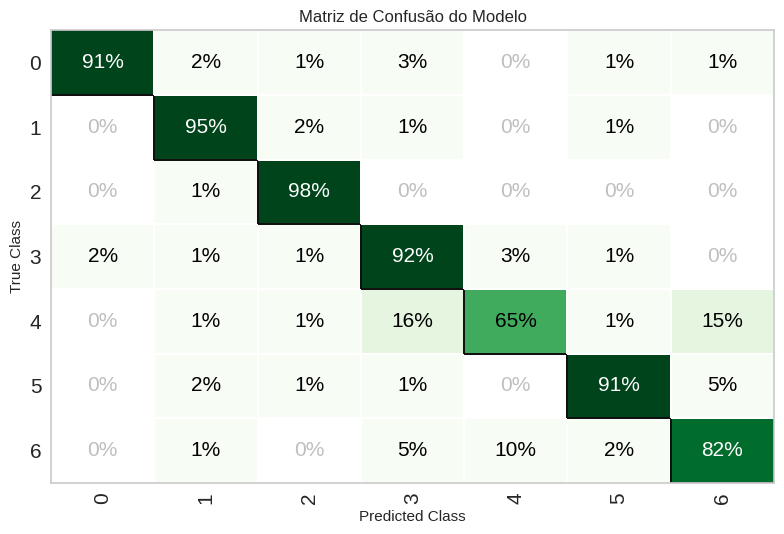

In [60]:
# Plot da Matriz de Confusão
plot_model(model, plot='confusion_matrix', plot_kwargs=dict(percent=True, title='Matriz de Confusão do Modelo'))


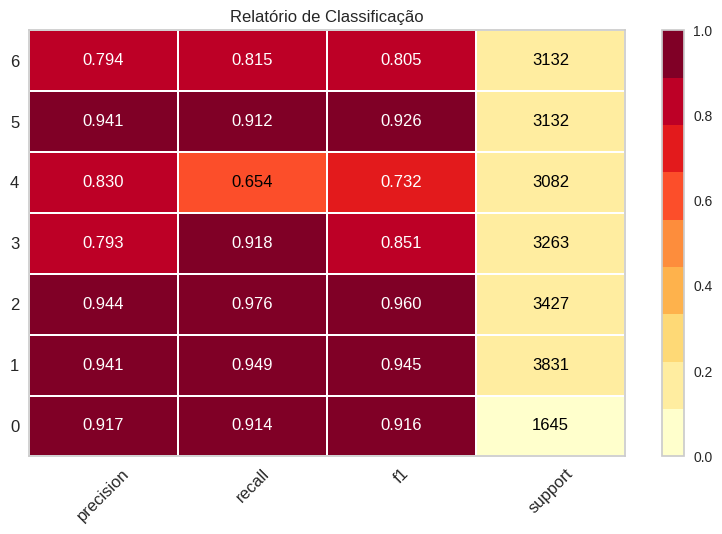

In [61]:
# Plot do Relatório de Classificação
plot_model(model, plot='class_report', plot_kwargs=dict(percent=True, title='Relatório de Classificação'))